In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sigma_list = np.linspace(0.1,10,100)
tlist = np.linspace(-4, 4, 8000)

In [3]:
in_one_photon = np.loadtxt("../outputs/ergotropy/input_one_photon_1.0.dat")
excited_atom = np.loadtxt("../outputs/ergotropy/excited_atom_1.0.dat")
gs_atom = np.loadtxt("../outputs/ergotropy/gs_atom_1.0.dat")

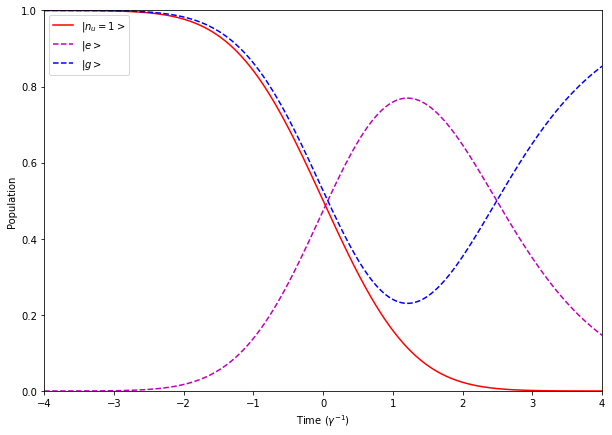

In [4]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, in_one_photon, '-r', label='$|n_{u}=1>$')
ax.plot(tlist, excited_atom, '--m', label='$|e>$')
ax.plot(tlist, gs_atom, '--b', label='$|g>$')
ax.set_xlim(-4,4)
ax.set_xlabel('Time ($\gamma^{-1}$)')
ax.set_ylim(0,1)
ax.set_ylabel('Population')
ax.legend()

plt.show()

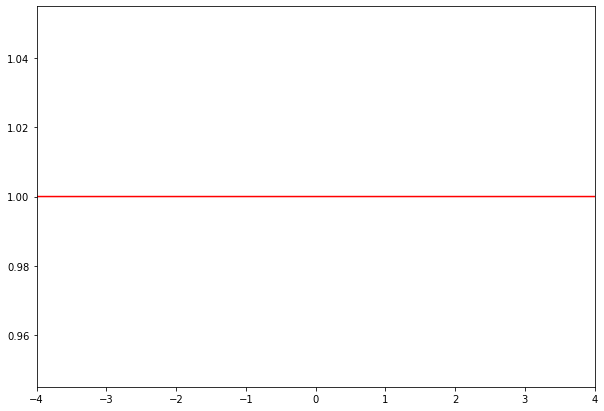

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(tlist, excited_atom+gs_atom, '-r')
ax.set_xlim(-4,4)
#ax.set_ylim(0,1)


plt.show()

In [6]:
max_erg = np.loadtxt("../outputs/ergotropy/max_gaussian_ergotropy.dat")
max_ene = np.loadtxt("../outputs/ergotropy/max_gaussian_energy.dat")
max_pow = np.loadtxt("../outputs/ergotropy/max_gaussian_power.dat")

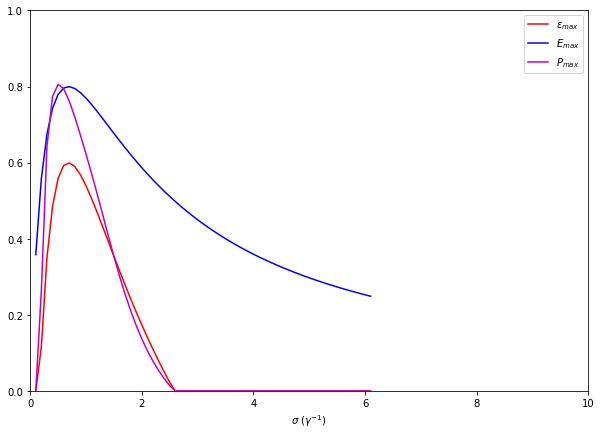

In [7]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(max_erg[:,0], max_erg[:,1], '-r', label='$\epsilon_{max}$')
ax.plot(max_ene[:,0], max_ene[:,1], '-b', label='$E_{max}$')
ax.plot(max_pow[:,0], max_pow[:,1], '-m', label='$P_{max}$')

ax.set_xlim(0,10)
ax.set_ylim(0,1)
#ax.set_ylabel('Max Ergotropy')
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')

ax.legend()

plt.show()

In [8]:
gas_pur = np.loadtxt("../outputs/ergotropy/gaussian_purity_1.0.dat")
gas_erg = np.loadtxt("../outputs/ergotropy/gaussian_ergotropy_1.0.dat")
gas_ene = np.loadtxt("../outputs/ergotropy/gaussian_energy_1.0.dat")

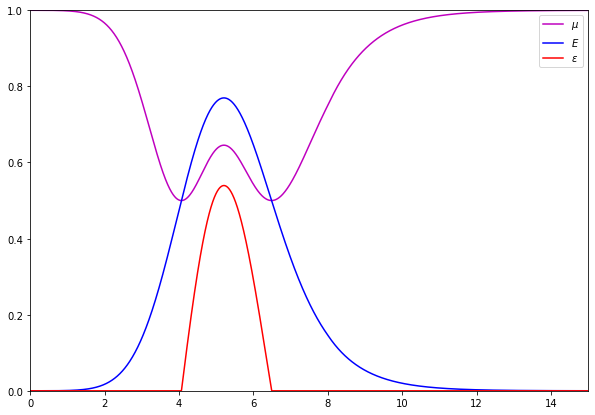

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(7)
fig.set_figwidth(10)

ax.plot(gas_pur[:,0], gas_pur[:,1], '-m', label='$\mu$')
ax.plot(gas_ene[:,0], gas_ene[:,1], '-b', label='$E$')
ax.plot(gas_erg[:,0], gas_erg[:,1], '-r', label='$\epsilon$')

ax.set_xlim(0,15)
ax.set_ylim(0,1)

ax.legend()

plt.show()